## Load Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Advance libraries 

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Dimentionality reduction and Feature selection

In [3]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## Data Creation

In [4]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


## Accuracy

In [5]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [6]:
df=pd.read_csv('train.csv')

In [7]:
df.head(5)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [8]:
corr=df.corr()

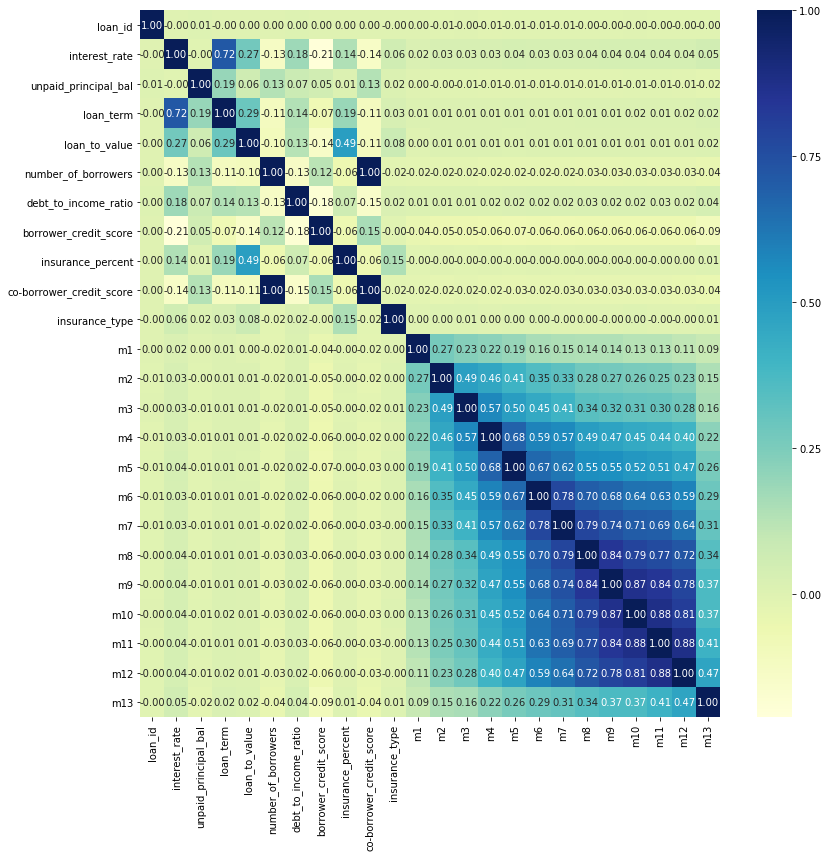

In [9]:
plt.figure(figsize=(13,13))
sns.heatmap(corr,annot=True,fmt=".2f",
            cmap="YlGnBu")

In [10]:
for name in df.columns:
    if(df[name].dtype=='object'):
        print(name)
        print(df[name].dtype)

source
object
financial_institution
object
origination_date
object
first_payment_date
object
loan_purpose
object


## Replace categorical values

In [11]:
cleanup_nums = {"source":     {"Z": 2, "Y": 1, "X": 0},
                "loan_purpose": {"C86": 2, "B12": 1, "A23": 0},
               "financial_institution":{'Browning-Hart':0, 'OTHER':1, 'Miller, Mcclure and Allen':2,
       'Sanchez, Hays and Wilkerson':3, 'Thornton-Davis':4,
       'Swanson, Newton and Miller':5, 'Cole, Brooks and Vincent':6,
       'Sanchez-Robinson':7, 'Edwards-Hoffman':8,
       'Turner, Baldwin and Rhodes':9, 'Richardson Ltd':10,
       'Taylor, Hunt and Rodriguez':11, 'Nicholson Group':12, 'Suarez Inc':13,
       'Martinez, Duffy and Bird':14, 'Anderson-Taylor':15, 'Richards-Walters':16,
       'Chapman-Mcmahon':17, 'Romero, Woods and Johnson':18}
               }

In [12]:
df.replace(cleanup_nums, inplace=True)
df.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,2,9,4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,1,5,4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,2,4,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,0,1,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,0,1,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [13]:
df.drop(['loan_id','origination_date','first_payment_date'], axis = 1,inplace=True)

In [14]:
df

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2,9,4.250,214000,360,95,1.0,22.0,694.0,2,...,0,0,0,1,0,0,0,0,0,1
1,1,5,4.875,144000,360,72,1.0,44.0,697.0,1,...,0,0,0,0,0,0,0,1,0,1
2,2,4,3.250,366000,180,49,1.0,33.0,780.0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,4.750,135000,360,46,2.0,44.0,633.0,1,...,0,0,0,0,0,1,1,1,1,1
4,0,1,4.750,124000,360,80,1.0,43.0,681.0,2,...,3,4,5,6,7,8,9,10,11,1
5,1,0,4.375,150000,360,80,1.0,46.0,675.0,2,...,0,0,0,0,0,0,0,0,0,1
6,0,1,4.000,59000,360,95,1.0,44.0,723.0,2,...,0,0,0,0,0,0,0,0,0,1
7,1,0,4.500,319000,300,62,1.0,45.0,652.0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,4.000,520000,360,76,1.0,35.0,808.0,2,...,0,1,0,1,0,1,2,0,1,1
9,0,1,4.000,214000,360,95,2.0,41.0,702.0,0,...,0,0,1,1,1,1,1,2,2,1


In [15]:
df.head(5)

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2,9,4.250,214000,360,95,1.0,22.0,694.0,2,...,0,0,0,1,0,0,0,0,0,1
1,1,5,4.875,144000,360,72,1.0,44.0,697.0,1,...,0,0,0,0,0,0,0,1,0,1
2,2,4,3.250,366000,180,49,1.0,33.0,780.0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,4.750,135000,360,46,2.0,44.0,633.0,1,...,0,0,0,0,0,1,1,1,1,1
4,0,1,4.750,124000,360,80,1.0,43.0,681.0,2,...,3,4,5,6,7,8,9,10,11,1


In [16]:
 def ShowPieChart(DataFrame,column1,column2):
    proportion=DataFrame.groupby(column1).count()[column2]
    col1=(((proportion)).sort_values(axis=0,ascending=False))
    total=proportion.sum()
    
    lstProportion=proportion/total
    col2=(((lstProportion*100)).sort_values(axis=0,ascending=False))
    plt.pie(lstProportion, autopct='%1.1f%%', shadow=False, startangle=140)
    plt.axis('equal')
    plt.show()
    
    dftemp=pd.DataFrame({'Total numer of rows':col1,'Ratio':col2})
    print(dftemp)


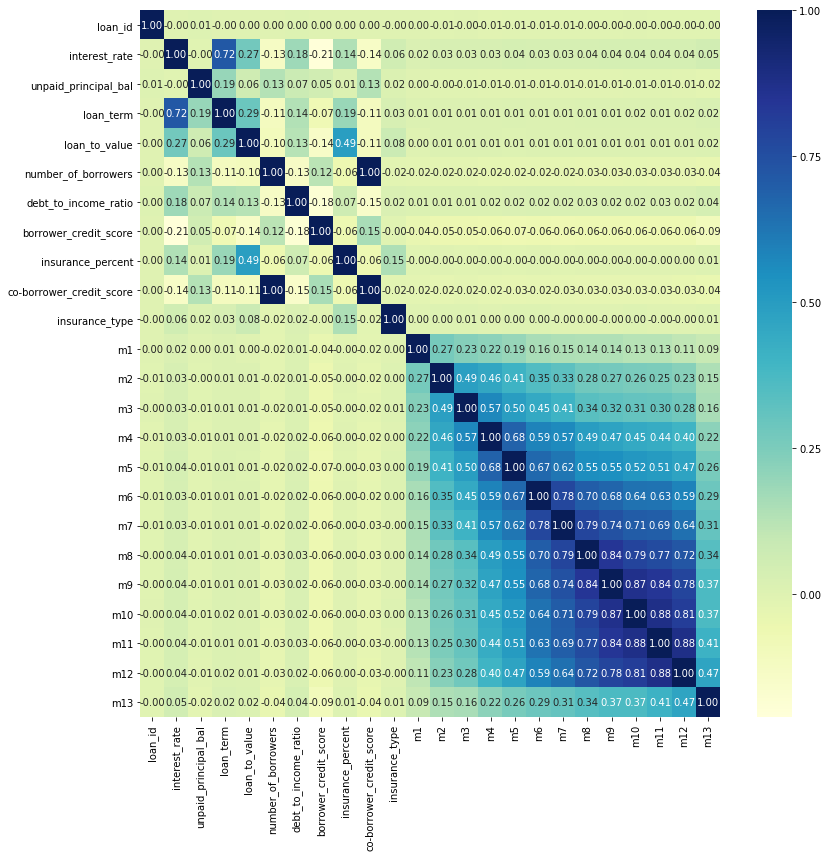

In [17]:
plt.figure(figsize=(13,13))
sns.heatmap(corr,annot=True,fmt=".2f",
            cmap="YlGnBu")

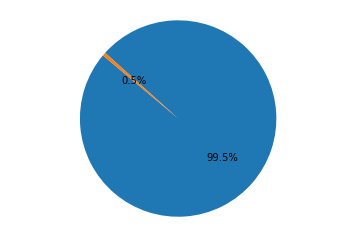

     Total numer of rows      Ratio
m13                                
0                 115422  99.451998
1                    636   0.548002


In [18]:
ShowPieChart(df,'m13','loan_term')

In [19]:
## Result: the data is not in correct proportion

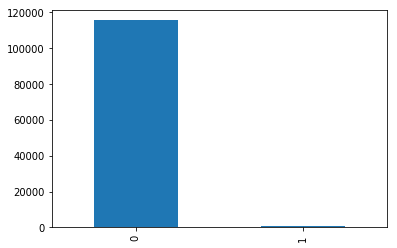

In [20]:
df['m13'].value_counts().plot.bar()

## Without SMOTE

In [21]:
#data = df.drop(['loan_id'], axis = 1)
X = np.array(df.loc[:, df.columns != 'm13'])
y = np.array(df.loc[:, df.columns == 'm13']).reshape(-1, 1)

In [22]:
# split into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [23]:
# import logistic regression model and accuracy_score metric

clf = LogisticRegression(solver = 'lbfgs')

In [24]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

In [25]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9941099308109776
Accuracy score for Testing Dataset =  0.994177545691906


In [26]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted      0   1    All
True                       
0          77300  32  77332
1            426   0    426
All        77726  32  77758


In [27]:
#Now let's interpret the results.
#426 out of 426 instances which belong to class 1 have been classifed as class 0.

In [28]:
426/426

1.0

In [29]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0   1    All
True                       
0          38077  13  38090
1            210   0    210
All        38287  13  38300


In [30]:
#210 out of 210 instances which belong to class 1 have been classifed as class 0.

In [31]:
print ('Accuracy:', accuracy_score(y_test, test_pred))
print ('F1 score:', f1_score(y_test, test_pred))
print ('Recall:', recall_score(y_test, test_pred))
print ('Precision:', precision_score(y_test, test_pred))
print ('\n clasification report:\n', classification_report(y_test,test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, test_pred))

Accuracy: 0.994177545691906
F1 score: 0.0
Recall: 0.0
Precision: 0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     38090
           1       0.00      0.00      0.00       210

    accuracy                           0.99     38300
   macro avg       0.50      0.50      0.50     38300
weighted avg       0.99      0.99      0.99     38300


 confussion matrix:
 [[38077    13]
 [  210     0]]


## With SMOTE

In [32]:

sm = SMOTE(random_state = 33)

In [33]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

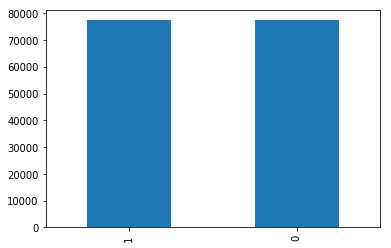

In [34]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [35]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [36]:

print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.6876325453887135
Accuracy score for Testing Dataset =  0.7066579634464752


In [37]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted      0      1     All
True                           
0          54650  22682   77332
1          25630  51702   77332
All        80280  74384  154664


In [38]:
20215/77332

0.2614053690580872

In [39]:

print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0      1    All
True                          
0          26936  11154  38090
1             81    129    210
All        27017  11283  38300


In [40]:
62/210

0.29523809523809524

In [41]:
print ('Accuracy:', accuracy_score(y_test, test_pred_sm))
print ('F1 score:', f1_score(y_test, test_pred_sm))
print ('Recall:', recall_score(y_test, test_pred_sm))
print ('Precision:', precision_score(y_test, test_pred_sm))
print ('\n clasification report:\n', classification_report(y_test,test_pred_sm))
print ('\n confussion matrix:\n',confusion_matrix(y_test, test_pred_sm))

Accuracy: 0.7066579634464752
F1 score: 0.02244844688071
Recall: 0.6142857142857143
Precision: 0.011433129486838606

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83     38090
           1       0.01      0.61      0.02       210

    accuracy                           0.71     38300
   macro avg       0.50      0.66      0.42     38300
weighted avg       0.99      0.71      0.82     38300


 confussion matrix:
 [[26936 11154]
 [   81   129]]


In [42]:
## Result:Thus Smote has improved the accuracy

In [43]:
## So, lets create a data frame again...

In [44]:
df.columns

Index(['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12', 'm13'],
      dtype='object')

In [45]:
X_train_new,y_train_new

(array([[0.        , 1.        , 4.25      , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 4.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 4.125     , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.        , 0.40563229, 4.02359193, ..., 0.        , 0.        ,
         1.        ],
        [0.        , 9.89262092, 5.27921004, ..., 0.57473975, 0.76631967,
         0.95789958],
        [0.0440767 , 1.1763068 , 4.35296165, ..., 0.9559233 , 0.9559233 ,
         1.9559233 ]]), array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [46]:
df_new=pd.DataFrame(X_train_new,columns=['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12'])

In [47]:
df_new['m13']=y_train_new

In [48]:
df_new.head(5)

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,0.0,1.0,4.250,199000.0,360.0,75.0,2.0,40.0,752.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,1.0,4.000,70000.0,360.0,54.0,1.0,34.0,820.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1.0,4.125,328000.0,360.0,80.0,2.0,29.0,744.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,1.0,3.875,91000.0,180.0,67.0,1.0,23.0,631.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,1.0,3.875,172000.0,180.0,80.0,2.0,42.0,720.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [49]:
X=df_new.loc[:,['source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'loan_purpose', 'insurance_percent', 'co-borrower_credit_score',
       'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9',
       'm10', 'm11', 'm12']]
Y=df_new.loc[:,['m13']]
x_trainm,x_testm,y_trainm,y_testm=train_test_split(X,Y,test_size=0.35)
all_mergedfeatures = df_new.drop("m13",axis=1)
Targeted_mergedfeature = df_new["m13"]

In [50]:
def ApplyDecisionTree(X_train,X_test,y_train,y_test,all_features,Targeted_feature):
    # Decision Tree
    
    model= DecisionTreeClassifier(criterion='entropy', 
                                 min_samples_split=6,min_samples_leaf=3,
                                 max_features='auto')
    model.fit(X_train,y_train)
    prediction_tree=model.predict(X_test)
    print('--------------The Accuracy of the model----------------------------')
    print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
    print ('Accuracy:', accuracy_score(y_test, prediction_tree))
    print ('F1 score:', f1_score(y_test, prediction_tree))
    return model

In [51]:
decision_model=ApplyDecisionTree(x_trainm,x_testm,y_trainm,y_testm,all_mergedfeatures,Targeted_mergedfeature)

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 99.26
Accuracy: 0.9926477379786821
F1 score: 0.9925721324325334


In [52]:
df_test=pd.read_csv('test.csv')
df_test.replace(cleanup_nums, inplace=True)
df_test.head()
df_test.drop(['loan_id','origination_date','first_payment_date'], axis = 1,inplace=True)
Y_predict=decision_model.predict(df_test)
df_sub=pd.read_csv('test.csv')
df_sub.columns
df_submission=pd.DataFrame({'loan_id':df_sub['loan_id'],'m13':Y_predict})
df_submission.to_csv('Submission.csv')

In [53]:
def ApplyRandomForest(X_train,X_test,y_train,y_test,all_features,Targeted_feature):
    # Random Forests
    
    model = RandomForestClassifier(criterion='entropy', n_estimators=1000,
                                 min_samples_split=5,min_samples_leaf=4,
                                 max_features='sqrt',oob_score=True,
                                 random_state=1,n_jobs=-1,max_depth=65)
    model.fit(X_train,y_train)
    prediction_rm=model.predict(X_test)
    print('--------------The Accuracy of the model----------------------------')
    print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
    print ('Accuracy:', accuracy_score(y_test, prediction_rm))
    print ('F1 score:', f1_score(y_test, prediction_rm))
    return model

In [54]:
Model_randomForest=ApplyRandomForest(x_trainm,x_testm,y_trainm,y_testm,all_mergedfeatures,Targeted_mergedfeature)

C:\Users\chaturvedi_v\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 99.73
Accuracy: 0.9973398850978147
F1 score: 0.9973142345568489


In [55]:
##Now lets create the file

In [56]:
df_test=pd.read_csv('test.csv')
df_test.replace(cleanup_nums, inplace=True)
df_test.head()
df_test.drop(['loan_id','origination_date','first_payment_date'], axis = 1,inplace=True)
Y_predict=Model_randomForest.predict(df_test)
df_sub=pd.read_csv('test.csv')
df_sub.columns
df_submission=pd.DataFrame({'loan_id':df_sub['loan_id'],'m13':Y_predict})
df_submission.to_csv('Submission.csv')